# Optimization of Topic Models with Grid Search Method


This Python notebook is from the Optimization of Topic Models with Grid Search Method Coursera course. I have simply edited it to add my own comments to explain parts that weren't clear to me. All credit goes to Barsha Saha. 

*   **Prerequisites:** It is expected from the learners to have an idea of Topic Modelling as an unsupervised machine learning tool for efficient text mining.
*   You can refer to my other course: Introduction to Topic Modeling for Business 
  (https://www.coursera.org/projects/introduction-to-topic-modeling-for-business) for basics of topic modelling
*   The **focus** of this project is on optimizing topic models using Grid Search method available in Scikit Learn package. 
*   The code for building basic topic model is given
*   We will be working out on finding the best fit/optimized model




##Tasks to be covered
### Task 1: Upload and explore dataset
### Task 2: Clean dataset & Visualize frequent words
### Task 3: Tokenization, Lemmatization and Word Document Matrix
### Task 4: Build LDA Model with Scikit Learn
### Task 5: Grid Search for Model Optimization
### Task 6: Visualization of Top N-words of Best Model

## Import Modules

In [1]:
# Import modules

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

#TextHero
!pip install texthero -U   
import texthero as hero

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
!pip install -U pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 245kB 3.6MB/s 
     |████████████████████████████████| 1.4MB 4.7MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434676 sha256=fa311cf5fc23cfc9d398f1270abb236e25b1f34416cbb98762542412df7d2dea
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 1.6MB 2.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=cec4232a91d2d81c8430907ff271cd696844917791d24fe23079de593e326357
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


## Task 1: Upload and explore dataset

In [2]:
# Upload .csv file
from google.colab import files
uploaded = files.upload()

Saving DigitalEconomyDatasetTM.csv to DigitalEconomyDatasetTM.csv


In [3]:
# Store dataset in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['DigitalEconomyDatasetTM.csv']))

In [4]:
# Dimesnion
print(df.shape)

(2488, 5)


In [5]:
# Dataset
df.head()

,Authors,Title,Year,Abstract,Keywords
0,"Nguyen Q.K., Dang Q.V.",Blockchain Technology - Opportunities for Emer...,2018,The recent major scientific conferences on the...,blockchain; digitaltechnology; distributed dia...
1,"Melnyk M., Korcelli-Olejniczak E., Chorna N., ...",Development of regional IT clusters in Ukraine...,2018,Introduction. Accelerated introduction of mode...,Country’s Innovation Ecosystem; Development of...
2,"Reisman R., Bertini M.",A novel architecture to monetize digital offer...,2018,As commerce continues to shift to the digital ...,Digital goods; Electronic commerce; Price disc...
3,"Bertola P., Teunissen J.",Fashion 4.0. Innovating fashion industry throu...,2018,Purpose: The on-going transition of societies ...,Design driven companies; Digital transformatio...
4,Moreno de la Santa J.G.-S.,The travel industry in 2018 – setting the scen...,2018,Purpose: The purpose of the paper is to identi...,China; Digital transformation; Global economy;...


## Task 2: Clean dataset & Visualize frequent words

In [6]:
#Pass a custom pipeline as argument to clean

from texthero import preprocessing
# https://pypi.org/project/texthero/
# Texthero is a really good library built off of Pandas and it allows for those with minimal knowledge of the NLP space to utilize powerful tools. 

custom_pipeline = [preprocessing.lowercase, # much easier than previous solution which was to df.remove. 
                   preprocessing.remove_punctuation,
                   preprocessing.remove_urls]
data = hero.clean(df['Abstract'])

In [7]:
# Custom STOPWORDS removal
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["c","two", "results", "first", "datum", "research", "economic", "study", "data", "development", "result", "analysis", "model", 
                 "based", "using", "new", "market", "business", "system", "use", "city", "research", "paper", "finding", "user", "right", "issue", "also"])) ## Add as per requirement
data = hero.remove_stopwords(data, custom_stopwords)

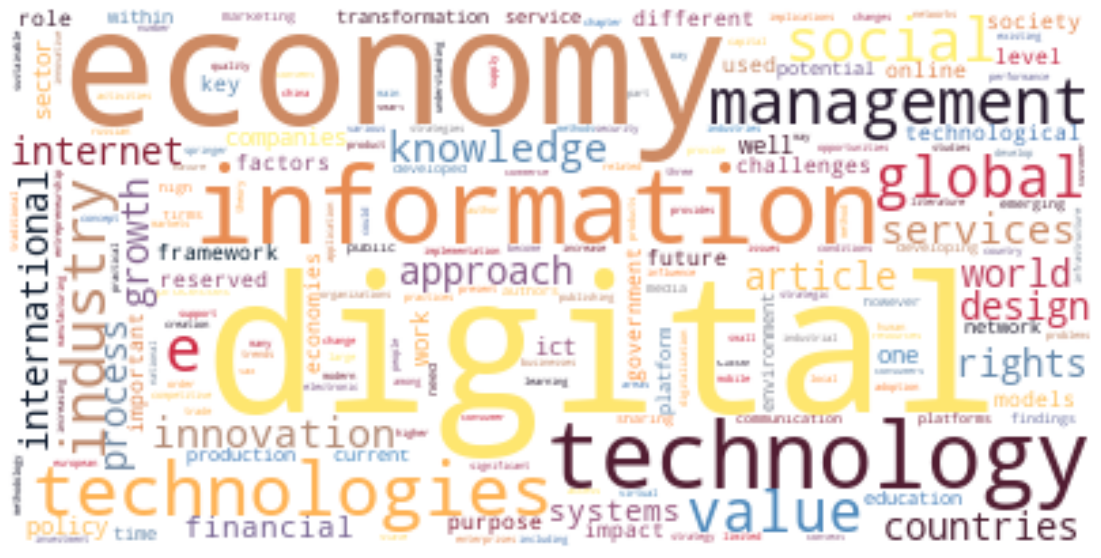

In [8]:
hero.visualization.wordcloud(data, font_path = None, width = 400, height = 200, max_words=200, 
                             mask=None, contour_width=0, 
                             contour_color='PAPAYAWHIP', background_color='WHITE', 
                             relative_scaling='auto', colormap=None, return_figure=False)

## Task 3: Tokenization, Lemmatization and Word Document Matrix

In [9]:
# Tokenize

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['recent', 'major', 'scientific', 'conferences', 'innovatube', 'frontier', 'ifs', 'focused', 'four', 'areas', 'pioneering', 'technologies', 'including', 'artificial', 'intelligence', 'internet', 'things', 'blockchain', 'augmented', 'reality', 'virtual', 'reality', 'blockchain', 'gained', 'lot', 'attention', 'technology', 'created', 'fever', 'bitcoin', 'ethereum', 'digital', 'coins', 'great', 'potentials', 'change', 'nature', 'real', 'world', 'everyone', 'lives', 'various', 'studies', 'blockchain', 'however', 'reality', 'percentage', 'people', 'understand', 'blockchain', 'remain', 'minute', 'highlight', 'important', 'role', 'blockchain', 'technology', 'future', 'world', 'especially', 'developing', 'countries', 'ieee']]


In [10]:
# Lemmatize
# Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, 
# normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.
# tl;dr put the verbs in their "stem" form. 

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adjective, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['recent major scientific conference focus area pioneer technology include artificial intelligence internet thing blockchain augment reality virtual reality blockchain gain lot attention technology create fever bitcoin ethereum coin potential change nature real world live various study blockchain however reality percentage people understand remain minute highlight important role blockchain technology future world especially develop country', 'introduction accelerate introduction modern technology area country social economy national information infrastructure integration global information space improvement information security condition strategic objective society furthermore recent year characterise active creation network organisation form cluster cooperation sphere joint endeavour company scientific educational establishment actor organisation cluster contribute optimisation process management course creation introduction information technologie product service company form powerfu

In [12]:
# Word-Document Matrix
# This converts a collection of text documents to a matrix of token counts. 
# A document-term matrix or term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 
# In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. 

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum number occurences of a word required
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}')  # num of characters > 3
                            

data_vectorized = vectorizer.fit_transform(data_lemmatized)

## Task 4: Build LDA Model with Scikit Learn

In [13]:
# Build LDA model with Sklearn

lda_model = LatentDirichletAllocation(n_components=15,               # Number of topics
                                      max_iter=10,                   # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,              # Random state
                                      batch_size=128)                # n docs in each learning iter
                                            
                                      
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=15, n_jobs=None,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [14]:
#Evaluate model quality

# Log Likelihood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp((-1) * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))


Log Likelihood:  -1404429.1718718472
Perplexity:  1085.6749072053267


In [15]:
#Visualize with pyLDAvis

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
5      114.344879  114.308296       1        1  26.096841
11     105.821045  -93.749626       2        1  17.259222
14    -138.334473   95.320763       3        1  13.954125
9       -7.436697  111.259697       4        1  11.273091
12    -207.550629 -105.472603       5        1   6.474689
7       52.817650   14.603765       6        1   5.332074
8      168.010849    6.806950       7        1   4.929087
1      -94.169601 -157.789551       8        1   4.535878
13    -122.849174  -39.059418       9        1   3.006802
2      -94.894264  195.408295      10        1   2.354890
6       24.927401 -180.464874      11        1   1.906449
0      -53.413467   26.832108      12        1   1.664807
4      -12.255850  -72.093201      13        1   0.993581
10    -224.217957   28.070581      14        1   0.113884
3       36.154255  209.427582      15        1   0.104579, topic_info=            Term        Freq       Total Category  logprob  loglift
1244  management  838.000000  838.000000  Default  30.0000  30.0000
1496    platform  738.000000  738.000000  Default  29.0000  29.0000
852    financial  526.000000  526.000000  Default  28.0000  28.0000
458      country  934.000000  934.000000  Default  27.0000  27.0000
1152   knowledge  686.000000  686.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1945       state    0.071287  404.725795  Topic15  -7.9887  -1.7813
2170     variety    0.071286   76.877469  Topic15  -7.9887  -0.1203
1080  innovation    0.071246  760.385386  Topic15  -7.9893  -2.4125
2077        time    0.071243  461.166503  Topic15  -7.9893  -1.9124
41      activity    0.071238  513.968947  Topic15  -7.9894  -2.0209

[911 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
13        1  0.212179  access
13        2  0.120235  access
13        4  0.318268  access
13        6  0.109626  access
13        7  0.106089  access
...     ...       ...     ...
2235      4  0.461470    year
2235      5  0.032196    year
2235      7  0.010732    year
2235      8  0.057237    year
2235     10  0.035773    year

[2620 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 12, 15, 10, 13, 8, 9, 2, 14, 3, 7, 1, 5, 11, 4])

## Task 5: Grid Search for Model Optimization

In [16]:
# Grid Search for Best LDA Model
# Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
# It is an exhaustive search that is performed on a the specific parameter values of a model. The model is also known as an estimator.
# This is computationally expensive and usually takes time... 

from sklearn.model_selection import GridSearchCV

# Define Search Param
params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Model
lda = LatentDirichletAllocation()

# Grid Search
model = GridSearchCV(lda, param_grid=params)

# Perform Grid Search
model.fit(data_vectorized)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [18]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -309572.7772649058
Model Perplexity:  1052.8785211574098


## Task 6: Visualization of Top N-words of Best Model

In [19]:
#Visualize with pyLDAvis

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  15.109854
4       0.648955  71.707100       2        1  14.233811
6      71.019684   9.971006       3        1  12.670211
1       3.785981  33.185135       4        1   9.816602
5     -42.666500  -9.222070       5        1   9.681697
3      -3.621689 -43.526516       6        1   8.609817
9      -3.632402  -4.171708       7        1   8.607745
7     -36.584400  35.804413       8        1   8.079360
2      44.391380  50.615383       9        1   7.163510
8      40.235809 -31.591665      10        1   6.027394, topic_info=            Term         Freq        Total Category  logprob  loglift
2167       value   905.000000   905.000000  Default  30.0000  30.0000
1496    platform   738.000000   738.000000  Default  29.0000  29.0000
2226        work   654.000000   654.000000  Default  28.0000  28.0000
856         firm   552.000000   552.000000  Default  27.0000  27.0000
1855     service  1135.000000  1135.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
539       design    67.574149   672.526437  Topic10  -5.1886   0.5110
275       change    70.718753   927.081531  Topic10  -5.1431   0.2355
133      article    63.261881   675.957460  Topic10  -5.2545   0.4400
852    financial    54.968556   529.773236  Topic10  -5.3951   0.5432
2046  technology    57.683233  2158.839957  Topic10  -5.3468  -0.8135

[672 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5         8  0.952775    abuse
8         4  0.078703  academy
8         5  0.787027  academy
13        1  0.202576   access
13        3  0.133906   access
...     ...       ...      ...
2231      8  0.049701    world
2231      9  0.023993    world
2231     10  0.003428    world
2238      1  0.867023    youth
2238      3  0.086702    youth

[2682 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 7, 2, 6, 4, 10, 8, 3, 9])

In [20]:
# Show top n keywords for each topic

def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

['ability' 'able' 'abroad' ... 'young' 'youth' 'zone']


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,economy,country,technology,digital,information,policy,global,sector,develop,industry
Topic 1,digital,industry,economy,technology,smart,global,sme,enterprise,tourism,organization
Topic 2,value,firm,digital,service,economy,platform,price,innovation,product,high
Topic 3,service,digital,platform,consumer,economy,online,medium,social,model,product
Topic 4,economy,digital,technology,process,information,management,method,approach,article,modern
Topic 5,digital,change,economy,social,education,knowledge,student,learn,skill,human
Topic 6,economy,technology,marketing,internet,firm,network,industry,information,emerge,digital
Topic 7,digital,economy,tax,law,trade,commerce,legal,article,regulation,policy
Topic 8,work,economy,worker,knowledge,labour,bank,employment,platform,digital,customer
Topic 9,technology,government,application,service,network,financial,information,adoption,mobile,design
